### Загрузка данных, разведка

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv('marketing_AB.csv')

In [8]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


Делаю домашку сильно позже, чем надо было. Всё, что по этой теме изучали - давно забыто. А датасет вижу впервые.

Не знаю, надо ли тут оставлять разведку, но пусть будет - хуже не станет.

In [9]:
df.shape

(588101, 7)

In [10]:
df['user id'].unique().shape

(588101,)

Количество уникальных пользователей совпадает с количеством записей. Дублей нет.

In [11]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Пропусков нет.

In [13]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [14]:
df.loc[df['test group'] == 'psa'].describe()

,Unnamed: 0,user id,total ads,most ads hour
count,23524.000000,23524.000000,23524.000000,23524.000000
mean,297302.795018,911761.500000,24.761138,14.304923
std,206995.969959,6790.938202,42.860720,4.656239
min,18.000000,900000.000000,1.000000,0.000000
25%,83618.250000,905880.750000,4.000000,11.000000
50%,293321.500000,911761.500000,12.000000,14.000000
75%,526178.750000,917642.250000,26.000000,18.000000
max,588081.000000,923523.000000,907.000000,23.000000


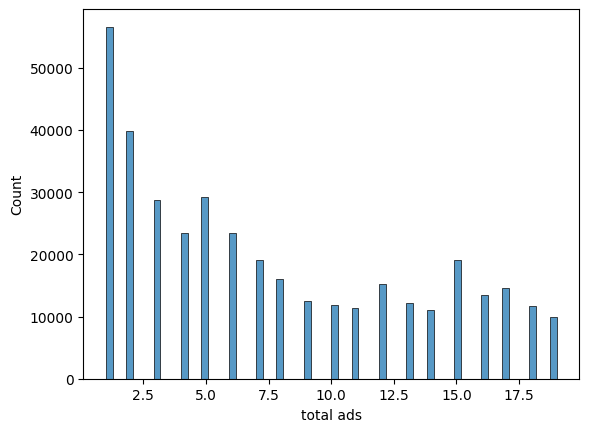

In [15]:
sns.histplot(df.loc[df['total ads'] < 20]['total ads'])
plt.show()

Интереный параметр. На последнем этапе будем группировать данные по нему.

### Какой тип рекламы был успешнее

In [16]:
df['converted_num'] = np.where(df['converted'], 1, 0)
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour,converted_num
0,0,1069124,ad,False,130,Monday,20,0
1,1,1119715,ad,False,93,Tuesday,22,0
2,2,1144181,ad,False,21,Tuesday,18,0
3,3,1435133,ad,False,355,Tuesday,10,0
4,4,1015700,ad,False,276,Friday,14,0


In [17]:
group_a = df[df['test group'] == 'ad']
group_a.shape

(564577, 8)

In [18]:
group_b = df[df['test group'] == 'psa']
group_b.shape

(23524, 8)

In [19]:
print('Конверсия всего:', df['converted_num'].mean())
print('Конверсия группы А:', group_a['converted_num'].mean())
print('Конверсия группы Б:', group_b['converted_num'].mean())

Конверсия всего: 0.02523886203220195
Конверсия группы А: 0.025546559636683747
Конверсия группы Б: 0.01785410644448223


In [20]:
stats.ttest_ind(group_a['converted_num'], group_b['converted_num'])

TtestResult(statistic=np.float64(7.37040597428566), pvalue=np.float64(1.7033052627831264e-13), df=np.float64(588099.0))

Нулевая гипотеза - это равенство конверсии в двух группах.

pvalue меньше 5%. Сильно меньше. Следовательно разница в конверсии статистически значима.

### Гетерогенные эффекты

Проверим, как количество показов рекламы, повлияло на конверсию.

In [37]:
het_a = (
    group_a[group_a['total ads'].between(0, 10)]['converted_num'].mean(),
    group_a[group_a['total ads'].between(11, 100)]['converted_num'].mean(),
    group_a[group_a['total ads'].between(101, 1000)]['converted_num'].mean(),
    group_a[group_a['total ads'].between(1001, 3000)]['converted_num'].mean()
)
het_a

(np.float64(0.0032585300943089954),
 np.float64(0.0335501528885006),
 np.float64(0.17126896175856118),
 np.float64(0.2222222222222222))

In [39]:
het_b = (
    group_b[group_b['total ads'].between(0, 10)]['converted_num'].mean(),
    group_b[group_b['total ads'].between(11, 100)]['converted_num'].mean(),
    group_b[group_b['total ads'].between(101, 1000)]['converted_num'].mean(),
    group_b[group_b['total ads'].between(1001, 3000)]['converted_num'].mean()
)
het_b

(np.float64(0.003990776871230933),
 np.float64(0.022690870261612386),
 np.float64(0.1188118811881188),
 nan)

С увеличением количетва показов, эффективность рекламы растёт в обеих группах.

Конверсия рекламы ad во всех сегментах выше, чем psa.

In [42]:
(
    stats.ttest_ind(group_a[group_a['total ads'].between(0, 10)]['converted_num'], group_b[group_b['total ads'].between(0, 10)]['converted_num']),
    stats.ttest_ind(group_a[group_a['total ads'].between(11, 100)]['converted_num'], group_b[group_b['total ads'].between(11, 100)]['converted_num']),
    stats.ttest_ind(group_a[group_a['total ads'].between(101, 1000)]['converted_num'], group_b[group_b['total ads'].between(101, 1000)]['converted_num'])
)

(TtestResult(statistic=np.float64(-1.3281318776587319), pvalue=np.float64(0.1841357064990187), df=np.float64(260773.0)),
 TtestResult(statistic=np.float64(6.310808438573357), pvalue=np.float64(2.779615738127518e-10), df=np.float64(304260.0)),
 TtestResult(statistic=np.float64(4.351850537583316), pvalue=np.float64(1.3557439766043152e-05), df=np.float64(23026.0)))

При количестве показов рекламы от 1 до 10 приемущества рекламы ad над psa не являются статистически значимыми (pvalue = 18%).

Во всех остальных сегментах pvalue < 5%, что говорит о существенном приемуществе рекламы ad.